### 2.3. Содержание ноутбука `HW02.ipynb` (основная часть)

В ноутбуке `homeworks/HW02/HW02.ipynb` необходимо выполнить следующие шаги.

#### 2.3.1. Загрузка данных и первичный осмотр

1. Импортировать необходимые библиотеки:
   - `pandas` (обязательно),
   - при необходимости `numpy`,
   - `matplotlib.pyplot` для визуализации.
2. Загрузить учебный датасет в `pandas.DataFrame` с помощью `pd.read_csv` (или другого подходящего метода).
3. Вывести:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики (`describe()` или аналог).

#### 2.3.2. Пропуски, дубликаты и базовый контроль качества

1. Посчитать долю пропусков в каждом столбце (например, через `isna().mean()` или аналог).
2. Проверить наличие полностью дублирующих строк (через `duplicated()`).
3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
   - отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
   - нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
   - другие логические противоречия, характерные для конкретного датасета.
4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

#### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

1. Посчитать частоты для одной или двух категориальных переменных (например, `value_counts()` для столбца с категорией/страной/классом).
2. Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`:
   - например, среднее и сумму по количественным признакам в разрезе категорий.
3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).
4. Кратко (1-2 абзаца) описать текстом основные наблюдения:
   - какие категории доминируют,
   - как отличаются группы по средним значениям,
   - есть ли неожиданные эффекты.

---

### 2.4. Визуализация данных в Matplotlib

В том же ноутбуке `HW02.ipynb` нужно построить как минимум:

1. **Одну гистограмму** для количественного признака:
   - осмысленный выбор числа корзин (`bins`),
   - подписи осей и заголовок.

2. **Один боксплот (boxplot)** для количественного признака:
   - можно как общий, так и по группам (например, по категориям),
   - подписи оси и заголовок.

3. **Один scatter plot** (диаграмма рассеяния) для пары количественных признаков:
   - подписи обеих осей,
   - заголовок,
   - при желании можно добавить цвет/легенду для различения категорий.

4. Сохранить **минимум один** из построенных графиков в папку `homeworks/HW02/figures/`:
   - использовать `plt.savefig(...)` или аналог;
   - убедиться, что файл действительно появляется в репозитории и может быть открыт отдельно от ноутбука.

Желательно снабдить графики краткими текстовыми комментариями:

- что именно показано;
- какие выводы можно сделать.

---

### 2.5. Опциональная часть: мостик к проекту

Опциональная (но рекомендованная) часть для тех, кто уже определился с темой проекта и имеет или может сгенерировать данные.

1. В папке `project/` создать (если ещё нет) папку `notebooks/`.
2. Создать ноутбук `project/notebooks/eda_v1.ipynb`.
3. В этом ноутбуке:
   - загрузить небольшой фрагмент будущих проектных данных (или реалистичный синтетический пример, если «боевые» данные пока недоступны);
   - выполнить минимум 3 простых проверки качества:
     - пропуски,
     - дубликаты,
     - подозрительные значения;
   - сделать 2-3 базовых графика (hist/boxplot/scatter) для ключевых признаков;
   - добавить 3-5 коротких текстовых наблюдений о данных.

Эта часть даёт задел для будущей работы над проектом, но не является критически обязательной для зачёта HW02 (см. критерии).

##2.3.1

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('S02-hw-dataset.csv')

In [6]:
# 1. Первые 5 строк
print(df.head())
print('-'*40)

# 2. Информация о столбцах и типах данных
print(df.info())
print('-'*40)
# 3. Базовые описательные статистики
print(df.describe())
print('-'*40)

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
----------------------------------------
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189 

##2.3.2


In [7]:
missing_ratio = df.isna().mean() #доля пропусков
print(missing_ratio)

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [8]:
duplicate_rows = df.duplicated().sum() #дубликаты
print(duplicate_rows)

1


In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns #поиск отрицательных числовых значений
for col in numeric_cols:
    negative_values = df[df[col] < 0]
    if not negative_values.empty:
        print(negative_values)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [ ]:
if 'age' in df.columns:               # нереалистичный возраст
    unrealistic_age = df[df['age'] > 100]
    if not unrealistic_age.empty:
        print(unrealistic_age)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


кто знает, но может это какая-то японская бабушка, раз возраст 120:)))

In [ ]:
if {'purchases', 'revenue'}.issubset(df.columns):
    inconsistent_data = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
    if not inconsistent_data.empty:
        print(inconsistent_data)


Подозрительные строки: нулевой доход при ненулевых количествах:
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


он в серую работает

По итогу, этот датасет стоит доочистить, так как неизвестен возраст части людей, также у одного человека есть брат дубликатный близнец, есть ненормальная отрицательная purchase, а также мегадолгожитель и подозрительный человек с неизвестным доходом


##2.3.3

In [19]:
print(df['country'].value_counts())
print(df['purchases'].value_counts())


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
purchases
 7     8
 6     8
 3     5
 5     4
 4     4
 2     3
 0     3
 9     2
-1     1
 8     1
 11    1
 1     1
Name: count, dtype: int64


In [ ]:
print("\nАгрегаты по странам:")
agr_country = df.groupby('country').agg(
    avg_age=('age', 'mean'),   # средний возраст по стране
    total_purchases=('purchases', 'sum'),  # общее кол-во покупок
    avg_revenue=('revenue', 'mean')    # средний доход
)
print(agr_country)


           avg_age  total_purchases  avg_revenue
country                                         
CN       24.000000                9  1054.000000
DE       34.600000               39  1445.500000
FR       46.250000               51   675.916667
RU       30.076923               62   790.076923
US       36.714286               37   557.375000


In [25]:
bins = [0,17, 25, 40, 60, 90, 200] 
labels = ['0-17','18-25','26-40','41-60','61-90', '91-200']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [26]:
agg_age_group = df.groupby('age_group').agg(
    avg_purchases=('purchases', 'mean'),
    avg_revenue=('revenue', 'mean')
)
print(agg_age_group)

           avg_purchases  avg_revenue
age_group                            
0-17            8.000000  1488.000000
18-25           4.909091   629.090909
26-40           5.285714  1065.357143
41-60           4.000000   632.333333
61-90                NaN          NaN
91-200         -1.000000   785.000000


C:\Users\anast\AppData\Local\Temp\ipykernel_22388\3964240028.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_age_group = df.groupby('age_group').agg(


1) среди стран доминирует РОССИЯ, а также больше всего purchases в кол-ве 7-8 штук
2) данные не равномерны, так как присутствуют достаточные отличные значения, например, по total_purchase, где есть минимальный 9 и потом идет 37
3) неожиданности есть особенно тут 0-17            8.000000  1488.000000 и в последних 2-х строках

##2.3.4


In [28]:
import os

fig_path = 'figures/'
os.makedirs(fig_path, exist_ok=True)

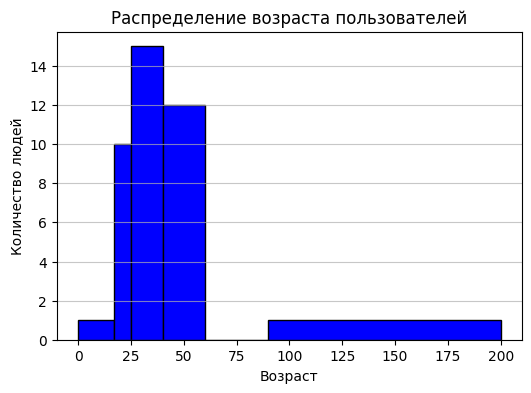

In [33]:
plt.figure(figsize=(6,4))
plt.hist(df['age'].dropna(), bins = [0,17, 25, 40, 60, 90, 200] , color='blue', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.title('Распределение возраста пользователей')
plt.grid(axis='y', alpha=0.7)
plt.show()

видно, шо большинство сюда попавших людей в возрасте от ~17 до ~60, есть выбросс

<Figure size 600x400 with 0 Axes>

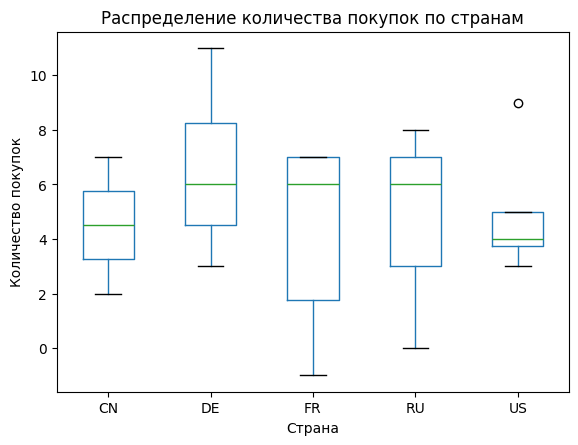

In [34]:
plt.figure(figsize=(6,4))
df.boxplot(column='purchases', by='country', grid=False)
plt.xlabel('Страна')
plt.ylabel('Количество покупок')
plt.title('Распределение количества покупок по странам')
plt.suptitle('')
plt.show()

в среднем кол-во покупок одинаково, ну и есть особенный выброс в us

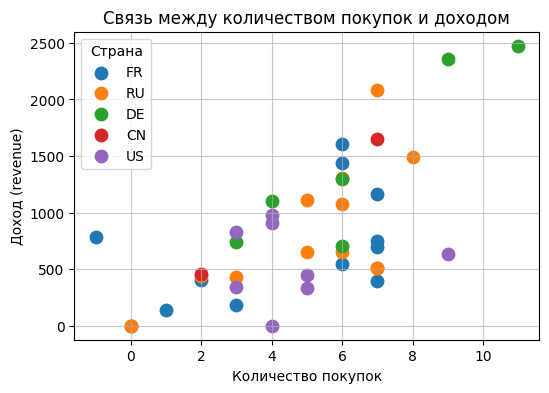

In [41]:
plt.figure(figsize=(6,4))
for country in df['country'].unique():
    subset = df[df['country'] == country]
    plt.scatter(subset['purchases'], subset['revenue'], label=country, s=80)

plt.xlabel('Количество покупок')
plt.ylabel('Доход (revenue)')
plt.title('Связь между количеством покупок и доходом')
plt.legend(title='Страна')
plt.grid(True, alpha=0.7)
plt.savefig(os.path.join(fig_path, 'scatter_purchases_revenue.png'))
plt.show()




видно, что не всегда больше покупок, больше доход, есть выбросы
